In [308]:
#Q1: Which countries are most users based in?

#Q2: Do more likes, subscribers, and comments lead to more views for a video?

#Q3: Which videos had higher subscribers?

#Q4: What are the most common keywords used in video titles?

In [309]:
#Import essential ibraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
os.getcwd()

'/Users/kioshi/Desktop/Me/Python/Projects/ken_jee_youtube_data'

In [310]:
#Load 4 individual csv files
df_agg_country_subs = pd.read_csv('Aggregated_Metrics_By_Country_And_Subscriber_Status.csv')
df_agg_vid_metrics = pd.read_csv('Aggregated_Metrics_By_Video.csv')
df_all_comm = pd.read_csv('All_Comments_Final.csv')
df_vid_perf_ovt = pd.read_csv('Video_Performance_Over_Time.csv')

In [311]:
#Lets do an EDA on 'df_agg_country_subs' to try to answer Q1
#Check data
df_agg_country_subs

,Video Title,External Video ID,Video Length,Thumbnail link,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55287,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,MM,False,1,0,0,0,0,0,0.622642,33.000000,0
55288,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,SA,True,14,1,0,0,0,0,0.515569,27.325143,0
55289,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,DZ,False,2,0,0,0,0,0,0.782075,41.450000,0
55290,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,MX,False,11,0,0,0,0,0,0.636178,33.717455,0


In [312]:
#Rename columns to lower case & underscore to make it easier to code
rename = {'Video Title':'video_title', 'External Video ID':'external_video_id', 'Video Length':'video_length', 
          'Thumbnail link':'thumbnail_link', 'Country Code':'country_code', 'Is Subscribed':'is_subscribed', 'Views':'views', 
          'Video Likes Added':'video_likes_added', 'Video Dislikes Added':'video_dislikes_added', 'Video Likes Removed':'video_likes_removed', 
         'User Subscriptions Added':'user_subscriptions_added', 'User Subscriptions Removed':'user_subscriptions_removed', 
         'Average View Percentage':'average_view_percentage', 'Average Watch Time':'average_watch_time', 'User Comments Added':'user_comments_added'}
df_agg_country_subs = df_agg_country_subs.rename(columns=rename)
df_agg_country_subs

,video_title,external_video_id,video_length,thumbnail_link,country_code,is_subscribed,views,video_likes_added,video_dislikes_added,video_likes_removed,user_subscriptions_added,user_subscriptions_removed,average_view_percentage,average_watch_time,user_comments_added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55287,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,MM,False,1,0,0,0,0,0,0.622642,33.000000,0
55288,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,SA,True,14,1,0,0,0,0,0.515569,27.325143,0
55289,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,DZ,False,2,0,0,0,0,0,0.782075,41.450000,0
55290,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,MX,False,11,0,0,0,0,0,0.636178,33.717455,0


In [313]:
#Check data types
df_agg_country_subs.dtypes

video_title                    object
external_video_id              object
video_length                    int64
thumbnail_link                 object
country_code                   object
is_subscribed                    bool
views                           int64
video_likes_added               int64
video_dislikes_added            int64
video_likes_removed             int64
user_subscriptions_added        int64
user_subscriptions_removed      int64
average_view_percentage       float64
average_watch_time            float64
user_comments_added             int64
dtype: object

In [314]:
#Get description of each column
df_agg_country_subs.describe()

,video_length,views,video_likes_added,video_dislikes_added,video_likes_removed,user_subscriptions_added,user_subscriptions_removed,average_view_percentage,average_watch_time,user_comments_added
count,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,53854.000000,53854.000000,55292.0
mean,896.678073,100.573157,4.239311,0.106055,0.175577,2.365279,0.053389,0.347821,205.297156,0.0
std,927.380801,1704.966002,65.291451,2.507351,3.601171,65.889539,0.766945,0.259734,206.542106,0.0
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,375.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.145948,85.442891,0.0
50%,545.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.320983,170.139725,0.0
75%,934.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.486153,259.449958,0.0
max,5029.000000,285593.000000,9165.000000,399.000000,436.000000,9599.000000,103.000000,4.967797,5027.660000,0.0


In [315]:
#Find Null values
df_agg_country_subs.isnull().sum()

video_title                      0
external_video_id                0
video_length                     0
thumbnail_link                   0
country_code                   386
is_subscribed                    0
views                            0
video_likes_added                0
video_dislikes_added             0
video_likes_removed              0
user_subscriptions_added         0
user_subscriptions_removed       0
average_view_percentage       1438
average_watch_time            1438
user_comments_added              0
dtype: int64

In [316]:
#Display and analyze Null values in detail
df_null = df_agg_country_subs[df_agg_country_subs.isnull().any(axis=1)]
df_null

,video_title,external_video_id,video_length,thumbnail_link,country_code,is_subscribed,views,video_likes_added,video_dislikes_added,video_likes_removed,user_subscriptions_added,user_subscriptions_removed,average_view_percentage,average_watch_time,user_comments_added
103,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,NaN,True,1,0,0,0,0,0,0.071864,4.24,0
183,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,PR,False,0,0,0,0,0,0,NaN,NaN,0
193,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,NaN,False,0,0,0,0,0,0,NaN,NaN,0
211,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,EE,False,0,0,0,0,0,0,NaN,NaN,0
264,git for Data Science Made Simple... (Hopefully),_0rHU6qAQe0,392,https://i.ytimg.com/vi/_0rHU6qAQe0/hqdefault.jpg,ME,False,0,0,0,0,0,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55150,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,NO,False,0,0,0,0,0,0,NaN,NaN,0
55178,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,KG,False,0,0,0,0,0,0,NaN,NaN,0
55212,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,BE,False,0,0,0,0,0,0,NaN,NaN,0
55235,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,NaN,False,0,0,0,0,0,0,NaN,NaN,0


In [317]:
#Examining the null values, we see inconsistency where there's null for 'Country Code', but values for 'Average View Percentage' & 'Average Watch Time' and vice versa.

#To have valid insights, we will drop the row from 'df_agg_country_subs' if it has null values in all three columns mentioned above & create another df with null values from country code removed
df_notna = df_agg_country_subs.dropna(thresh=13)
df_notna.head(25)

,video_title,external_video_id,video_length,thumbnail_link,country_code,is_subscribed,views,video_likes_added,video_dislikes_added,video_likes_removed,user_subscriptions_added,user_subscriptions_removed,average_view_percentage,average_watch_time,user_comments_added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0
5,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ZZ,True,4,0,0,0,0,0,0.784517,46.286500,0
6,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,AR,True,30,3,0,0,0,0,0.671451,39.615600,0
7,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,BB,False,1,0,0,0,0,0,0.508475,30.000000,0
8,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,KZ,True,6,0,0,0,0,0,0.649322,38.310000,0
9,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,NP,False,12,0,0,0,0,0,0.389364,22.972500,0


In [318]:
df_notna_country = df_agg_country_subs.dropna(subset=['country_code'])
df_notna_country

,video_title,external_video_id,video_length,thumbnail_link,country_code,is_subscribed,views,video_likes_added,video_dislikes_added,video_likes_removed,user_subscriptions_added,user_subscriptions_removed,average_view_percentage,average_watch_time,user_comments_added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55287,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,MM,False,1,0,0,0,0,0,0.622642,33.000000,0
55288,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,SA,True,14,1,0,0,0,0,0.515569,27.325143,0
55289,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,DZ,False,2,0,0,0,0,0,0.782075,41.450000,0
55290,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,MX,False,11,0,0,0,0,0,0.636178,33.717455,0


In [319]:
#Quick Google search tells us 'ZZ' is unknown_unspecified country' and XK is for the country 'Sao Tome and Principe'

#Drop ZZ & TL from 'country_code' column
df_notna_country = df_notna_country.drop(
    df_notna_country[df_notna_country.country_code.isin(['ZZ', 'TL', 'EH', 'SX'])].index)
df_notna_country

,video_title,external_video_id,video_length,thumbnail_link,country_code,is_subscribed,views,video_likes_added,video_dislikes_added,video_likes_removed,user_subscriptions_added,user_subscriptions_removed,average_view_percentage,average_watch_time,user_comments_added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55287,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,MM,False,1,0,0,0,0,0,0.622642,33.000000,0
55288,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,SA,True,14,1,0,0,0,0,0.515569,27.325143,0
55289,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,DZ,False,2,0,0,0,0,0,0.782075,41.450000,0
55290,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,MX,False,11,0,0,0,0,0,0.636178,33.717455,0


In [320]:
#Verify null values decreased
df_notna.isnull().sum()

video_title                      0
external_video_id                0
video_length                     0
thumbnail_link                   0
country_code                   196
is_subscribed                    0
views                            0
video_likes_added                0
video_dislikes_added             0
video_likes_removed              0
user_subscriptions_added         0
user_subscriptions_removed       0
average_view_percentage       1248
average_watch_time            1248
user_comments_added              0
dtype: int64

In [321]:
#Verify no null values in 'Country Code' column
df_notna_country.isnull().sum()

video_title                      0
external_video_id                0
video_length                     0
thumbnail_link                   0
country_code                     0
is_subscribed                    0
views                            0
video_likes_added                0
video_dislikes_added             0
video_likes_removed              0
user_subscriptions_added         0
user_subscriptions_removed       0
average_view_percentage       1231
average_watch_time            1231
user_comments_added              0
dtype: int64

In [322]:
#Retrieve country names from country abbreviations in 'country_code' column using pycountry library

#Import pycountry
import pycountry

#Define country names 
list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]
list_alpha_3 = [i.alpha_3 for i in list(pycountry.countries)]

def c_names(df_notna_country):
    if (len(df_notna_country['country_code'])==2 and df_notna_country['country_code'] in list_alpha_2):
        return pycountry.countries.get(alpha_2=df_notna_country['country_code']).name
    elif (len(df_notna_country['country_code'])==3 and df_notna_country['country_code'] in list_alpha_3):
        return pycountry.countries.get(alpha_3=df_notna_country['country_code']).name
    else:
        return 'Invalid Code'

#Put back into df_notna_country
df_notna_country['country'] = df_notna_country.apply(c_names, axis=1)
df_notna_country.head(25)

,video_title,external_video_id,video_length,thumbnail_link,country_code,is_subscribed,views,video_likes_added,video_dislikes_added,video_likes_removed,user_subscriptions_added,user_subscriptions_removed,average_view_percentage,average_watch_time,user_comments_added,country
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0,Hong Kong
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0,Montenegro
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0,Rwanda
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0,United States
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0,Germany
6,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,AR,True,30,3,0,0,0,0,0.671451,39.615600,0,Argentina
7,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,BB,False,1,0,0,0,0,0,0.508475,30.000000,0,Barbados
8,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,KZ,True,6,0,0,0,0,0,0.649322,38.310000,0,Kazakhstan
9,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,NP,False,12,0,0,0,0,0,0.389364,22.972500,0,Nepal
10,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,AL,True,2,0,0,0,0,0,0.515254,30.400000,0,Albania


In [323]:
#Retrieve continent names from 'country_code' column using pycountry_convert

#Import pycountry
import pycountry_convert as pc

#Convert 'country_code' column to continent codes using alpah2
df_notna_country['continent'] = df_notna_country.country_code.apply(pc.country_alpha2_to_continent_code)

#Convert 'continent' column from continent codes to continent names
df_notna_country['continent'] = df_notna_country.continent.apply(
    pc.convert_continent_code_to_continent_name)
df_notna_country

,video_title,external_video_id,video_length,thumbnail_link,country_code,is_subscribed,views,video_likes_added,video_dislikes_added,video_likes_removed,user_subscriptions_added,user_subscriptions_removed,average_view_percentage,average_watch_time,user_comments_added,country,continent
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0,Hong Kong,Asia
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0,Montenegro,Europe
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0,Rwanda,Africa
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0,United States,North America
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0,Germany,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55287,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,MM,False,1,0,0,0,0,0,0.622642,33.000000,0,Myanmar,Asia
55288,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,SA,True,14,1,0,0,0,0,0.515569,27.325143,0,Saudi Arabia,Asia
55289,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,DZ,False,2,0,0,0,0,0,0.782075,41.450000,0,Algeria,Africa
55290,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,MX,False,11,0,0,0,0,0,0.636178,33.717455,0,Mexico,North America


In [324]:
#Drop 'country_code' column and place 'country_name' in its place
df_country_names = df_notna_country.drop(['country_code'], axis=1)

country_short_name = df_country_names[['video_title', 'external_video_id', 'video_length', 'thumbnail_link', 'country', 
                'continent', 'is_subscribed', 'views', 'video_likes_added', 'video_dislikes_added', 'video_likes_removed', 
                'user_subscriptions_added', 'user_subscriptions_removed', 'average_view_percentage', 
                    'average_watch_time', 'user_comments_added']]
country_short_name.head(25)

,video_title,external_video_id,video_length,thumbnail_link,country,continent,is_subscribed,views,video_likes_added,video_dislikes_added,video_likes_removed,user_subscriptions_added,user_subscriptions_removed,average_view_percentage,average_watch_time,user_comments_added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Hong Kong,Asia,True,23,1,0,0,2,0,0.671870,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Montenegro,Europe,True,3,0,0,0,0,0,0.498870,29.433333,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Rwanda,Africa,True,2,0,0,0,0,0,0.681780,40.225000,0
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,United States,North America,True,979,81,6,8,16,4,0.694854,40.996389,0
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Germany,Europe,False,75,3,0,1,0,0,0.661515,39.029373,0
6,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Argentina,South America,True,30,3,0,0,0,0,0.671451,39.615600,0
7,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Barbados,North America,False,1,0,0,0,0,0,0.508475,30.000000,0
8,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Kazakhstan,Asia,True,6,0,0,0,0,0,0.649322,38.310000,0
9,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Nepal,Asia,False,12,0,0,0,0,0,0.389364,22.972500,0
10,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Albania,Europe,True,2,0,0,0,0,0,0.515254,30.400000,0


In [325]:
#Remove Invalid Code from 'country_name' column as that can skew the data.
country_short_name = country_short_name[country_short_name['country'].str.contains('Invalid Code')==False ]
country_short_name.head(25)

,video_title,external_video_id,video_length,thumbnail_link,country,continent,is_subscribed,views,video_likes_added,video_dislikes_added,video_likes_removed,user_subscriptions_added,user_subscriptions_removed,average_view_percentage,average_watch_time,user_comments_added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Hong Kong,Asia,True,23,1,0,0,2,0,0.671870,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Montenegro,Europe,True,3,0,0,0,0,0,0.498870,29.433333,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Rwanda,Africa,True,2,0,0,0,0,0,0.681780,40.225000,0
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,United States,North America,True,979,81,6,8,16,4,0.694854,40.996389,0
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Germany,Europe,False,75,3,0,1,0,0,0.661515,39.029373,0
6,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Argentina,South America,True,30,3,0,0,0,0,0.671451,39.615600,0
7,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Barbados,North America,False,1,0,0,0,0,0,0.508475,30.000000,0
8,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Kazakhstan,Asia,True,6,0,0,0,0,0,0.649322,38.310000,0
9,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Nepal,Asia,False,12,0,0,0,0,0,0.389364,22.972500,0
10,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Albania,Europe,True,2,0,0,0,0,0,0.515254,30.400000,0


In [326]:
#Get count of 'country names' to determine which country had the highest users views and lowest views
df_country_views = country_short_name.groupby('country')['views'].count()
df_country_views.head(10)

country
Afghanistan            168
Albania                284
Algeria                417
American Samoa          10
Andorra                 97
Angola                 157
Anguilla                 6
Antigua and Barbuda     78
Argentina              439
Armenia                325
Name: views, dtype: int64

In [327]:
##Countries with highest view count
df_country_views.nsmallest(10)

country
Eritrea                             1
Falkland Islands (Malvinas)         1
Niue                                1
Saint Barthélemy                    1
Kiribati                            2
Bonaire, Sint Eustatius and Saba    3
Nauru                               3
Saint Pierre and Miquelon           3
Montserrat                          5
Anguilla                            6
Name: views, dtype: int64

In [328]:
#Countries with lowest view count
df_country_views.nlargest(10)

country
Australia         445
Germany           445
India             445
Netherlands       445
United Kingdom    445
United States     445
Brazil            444
Canada            444
France            444
Malaysia          444
Name: views, dtype: int64

In [329]:
#Plot top 8 countries contributing to high view count
grouped = country_short_name.groupby('country')['views'].sum()
top10 = grouped.nlargest(10)
top10 = top10.reset_index(name='total_views')
top10

,country,total_views
0,United States,1354450
1,India,1155510
2,United Kingdom,239177
3,Canada,222373
4,Germany,172165
5,Australia,116295
6,Brazil,114161
7,Indonesia,112500
8,France,78852
9,Singapore,75794


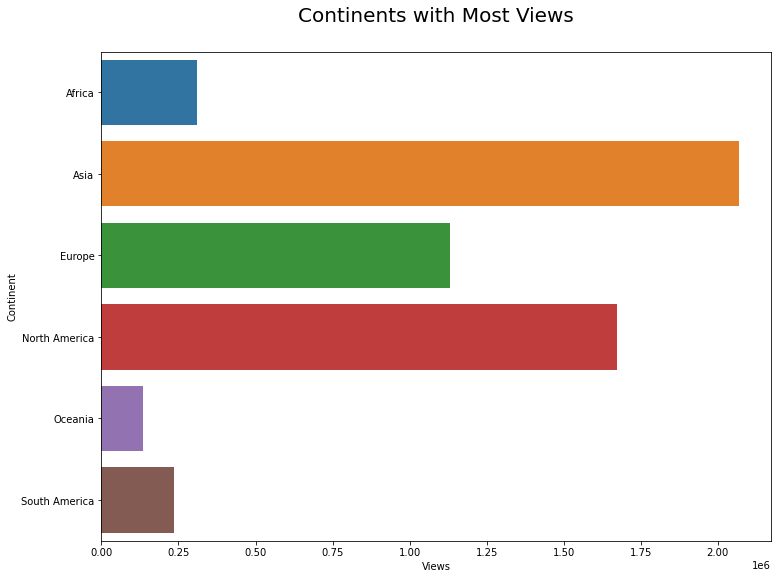

In [330]:
#Group and plot continents with the most views
continent_views = country_short_name.groupby('continent')['views'].sum()

#Reset index
continent_views = continent_views.reset_index(name='total_views')

#Plot bar graph of continents with most views
fig, ax = plt.subplots(figsize=(12, 9))
ax = sns.barplot(x='total_views', y='continent', data=continent_views)
plt.xlabel('Views')
plt.ylabel('Continent')
plt.title('Continents with Most Views', fontsize=20, pad=30)
plt.show()

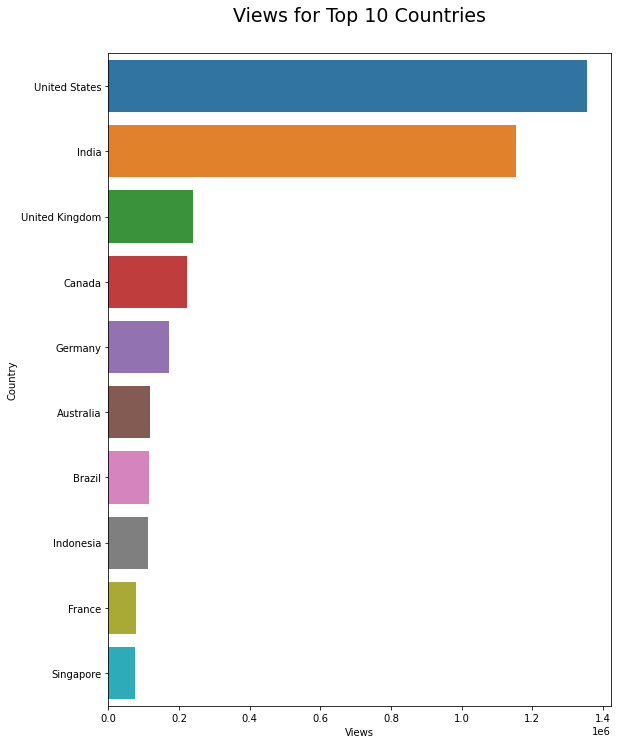

In [331]:
#Plot count of top10 countries
fig, ax = plt.subplots(figsize=(9,12))
ax = sns.barplot(x='total_views', y='country', data=top10)
plt.title('Views for Top 10 Countries', fontsize=19, pad=32)
plt.xlabel('Views')
plt.ylabel('Country')
plt.show()

In [332]:
print('Q1: Which countries are most users based in?')

print('A1: Most users were based in the United States with India coming in second')

Q1: Which countries are most users based in?
A1: Most users were based in the United States with India coming in second


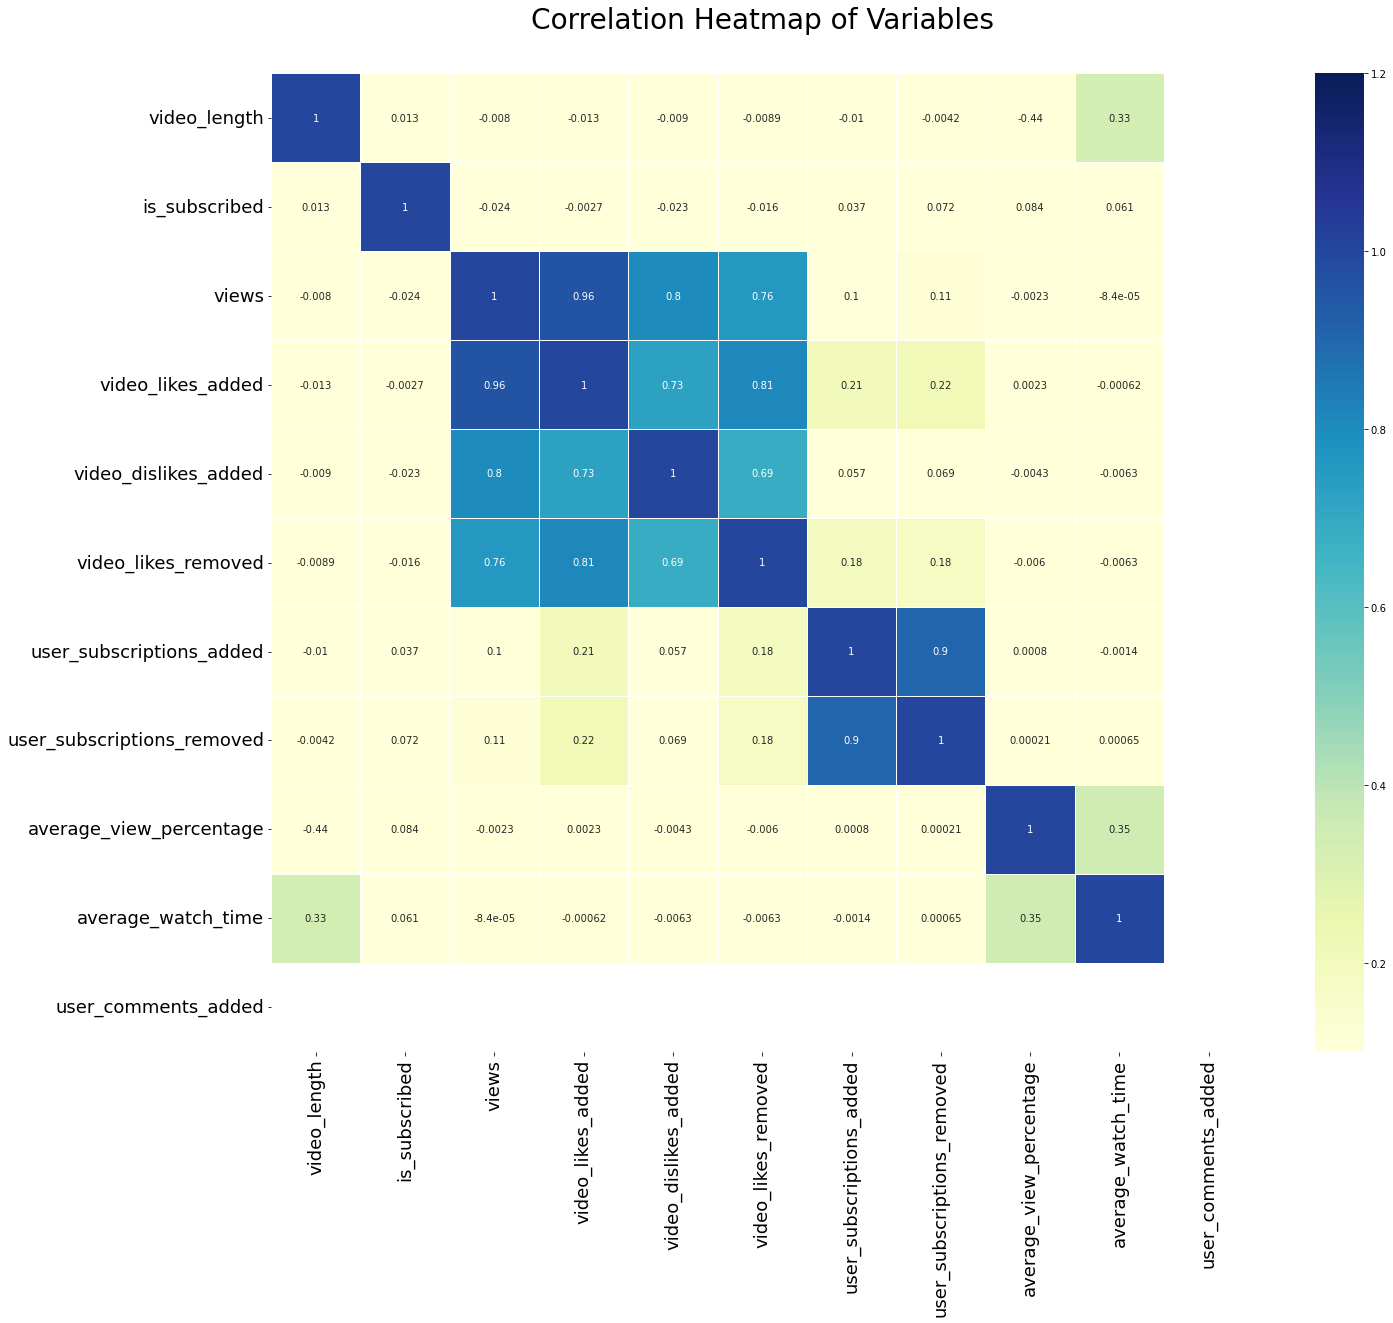

In [333]:
#On to answering Q2: Which leads to more views for a video, likes/dislikes, subscribers, and/or comments?

#Now that we have the data cleaned, let's use a heatmap to find correlations for the above 3 and views
#Plot heatmap
plt.figure(figsize=(22, 18))
heatmap_corr = sns.heatmap(data=country_short_name.corr(), linewidth=0.5, vmin=0.1, vmax=1.2, cmap='YlGnBu', annot=True)
heatmap_corr.set_xticklabels(heatmap_corr.get_xmajorticklabels(), fontsize=18)
heatmap_corr.set_yticklabels(heatmap_corr.get_ymajorticklabels(), fontsize=18)
heatmap_corr.set_title('Correlation Heatmap of Variables', fontdict={'fontsize':28}, pad=45)
plt.show()

#Looking at the heatmap, we can clearly see 'views' has a strong correlation to 'video_likes_added', and 'video_dislikes_removed', with a somewhat correlation to 'video likes_removed'.
#Comments have zero correlation in this data set and subscriptions added/removed also have about 0.10% correlation to views.

In [334]:
#We will focus on which videos with 'video_likes added', 'video_dislikes_added', and 'video_likes_removed' led to more views.
more_views = country_short_name.groupby(['video_title', 'video_likes_added', 'video_dislikes_added', 
                                            'video_likes_removed'])['views'].sum().sort_values(ascending=False).reset_index().head(6)
more_views

,video_title,video_likes_added,video_dislikes_added,video_likes_removed,views
0,How I Would Learn Data Science (If I Had to St...,9165,399,327,285593
1,How I Would Learn Data Science (If I Had to St...,8442,170,436,203055
2,The Best Free Data Science Courses Nobody is T...,4386,51,237,70240
3,How I Would Learn Data Science (If I Had to St...,1589,38,61,49982
4,How I Would Learn Data Science (If I Had to St...,1318,38,37,44835
5,3 Proven Data Science Projects for Beginners (...,2629,32,121,43314


In [335]:
#Set index
more_views.set_index('video_title', inplace=True)
more_views

,video_likes_added,video_dislikes_added,video_likes_removed,views
video_title,,,,
How I Would Learn Data Science (If I Had to Start Over),9165,399,327,285593
How I Would Learn Data Science (If I Had to Start Over),8442,170,436,203055
The Best Free Data Science Courses Nobody is Talking About,4386,51,237,70240
How I Would Learn Data Science (If I Had to Start Over),1589,38,61,49982
How I Would Learn Data Science (If I Had to Start Over),1318,38,37,44835
3 Proven Data Science Projects for Beginners (Kaggle),2629,32,121,43314


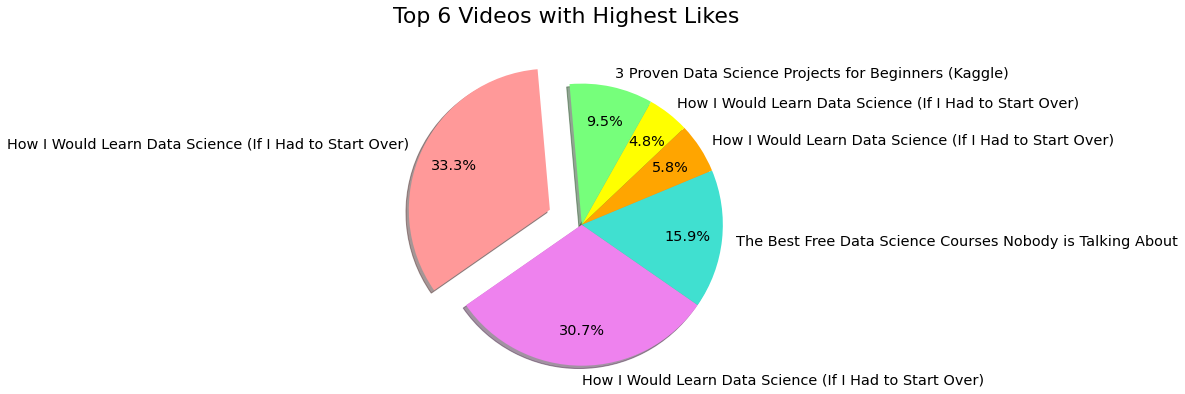

In [336]:
#Plot the above data using a pie chart to show Data-ink ratio for views
colors = ['#ff9999','#EE82EE','#40E0D0','#FFA500', '#ffff00', '#76FF7B']
explode = (0.25,0,0,0, 0, 0)
plt.rcParams['font.size'] = 14.5
plot = more_views.plot.pie(y='video_likes_added', legend=False, pctdistance=0.75, autopct='%1.1f%%', 
                           shadow=True, explode=explode, startangle=95, colors=colors, figsize=(8,6))
plt.ylabel(None)
plt.title('Top 6 Videos with Highest Likes', fontsize=22, pad=32)
plot.axis('equal')
plt.show()

In [337]:
#Summing up we can see 'video_likes_added' mostly had a relation to whether the video would get views. This answers our Q2.
print('Q2: Do more likes, subscribers, and comments lead to more views for a video?')
print('A2: More likes led to higher likes & How I would Learn Data Science ( If I had to Start Over) had the highest likes')

Q2: Do more likes, subscribers, and comments lead to more views for a video?
A2: More likes led to higher likes & How I would Learn Data Science ( If I had to Start Over) had the highest likes


In [338]:
#To answer Q3: Which videos led to higher subscriber count, we need to look at 'video_title' and 'is_subscribed' columns.

#Group 'country_short_name' dataframe with 'is_subscribed' column
country_subs1 = country_short_name.groupby('video_title')['is_subscribed'].count()

#Get top 10  subscribed video titles
top10_country_subs1 = country_subs1.nlargest(10)
top10_country_subs1

video_title
How I Would Learn Data Science (If I Had to Start Over)            417
The Best Free Data Science Courses Nobody is Talking About         396
3 Proven Data Science Projects for Beginners (Kaggle)              380
How I Learned Data Science                                         374
How I Would Learn Data Science in 2021 (What Has Changed?)         370
Beginner Kaggle Data Science Project Walk-Through (Titanic)        369
Why I Quit Data Science                                            367
Why You Probably Won't Become a Data Scientist                     367
How I Would Learn Data Science in 2022 (If I Had to Start Over)    365
Data Science Certificate vs Bootcamp vs Masters Degree             362
Name: is_subscribed, dtype: int64

In [339]:
#Set index to 'video_title' and name subscribed column
top10_country_subs1 = top10_country_subs1.reset_index(name='total_subscribers')
top10_country_subs1

,video_title,total_subscribers
0,How I Would Learn Data Science (If I Had to St...,417
1,The Best Free Data Science Courses Nobody is T...,396
2,3 Proven Data Science Projects for Beginners (...,380
3,How I Learned Data Science,374
4,How I Would Learn Data Science in 2021 (What H...,370
5,Beginner Kaggle Data Science Project Walk-Thro...,369
6,Why I Quit Data Science,367
7,Why You Probably Won't Become a Data Scientist,367
8,How I Would Learn Data Science in 2022 (If I H...,365
9,Data Science Certificate vs Bootcamp vs Master...,362


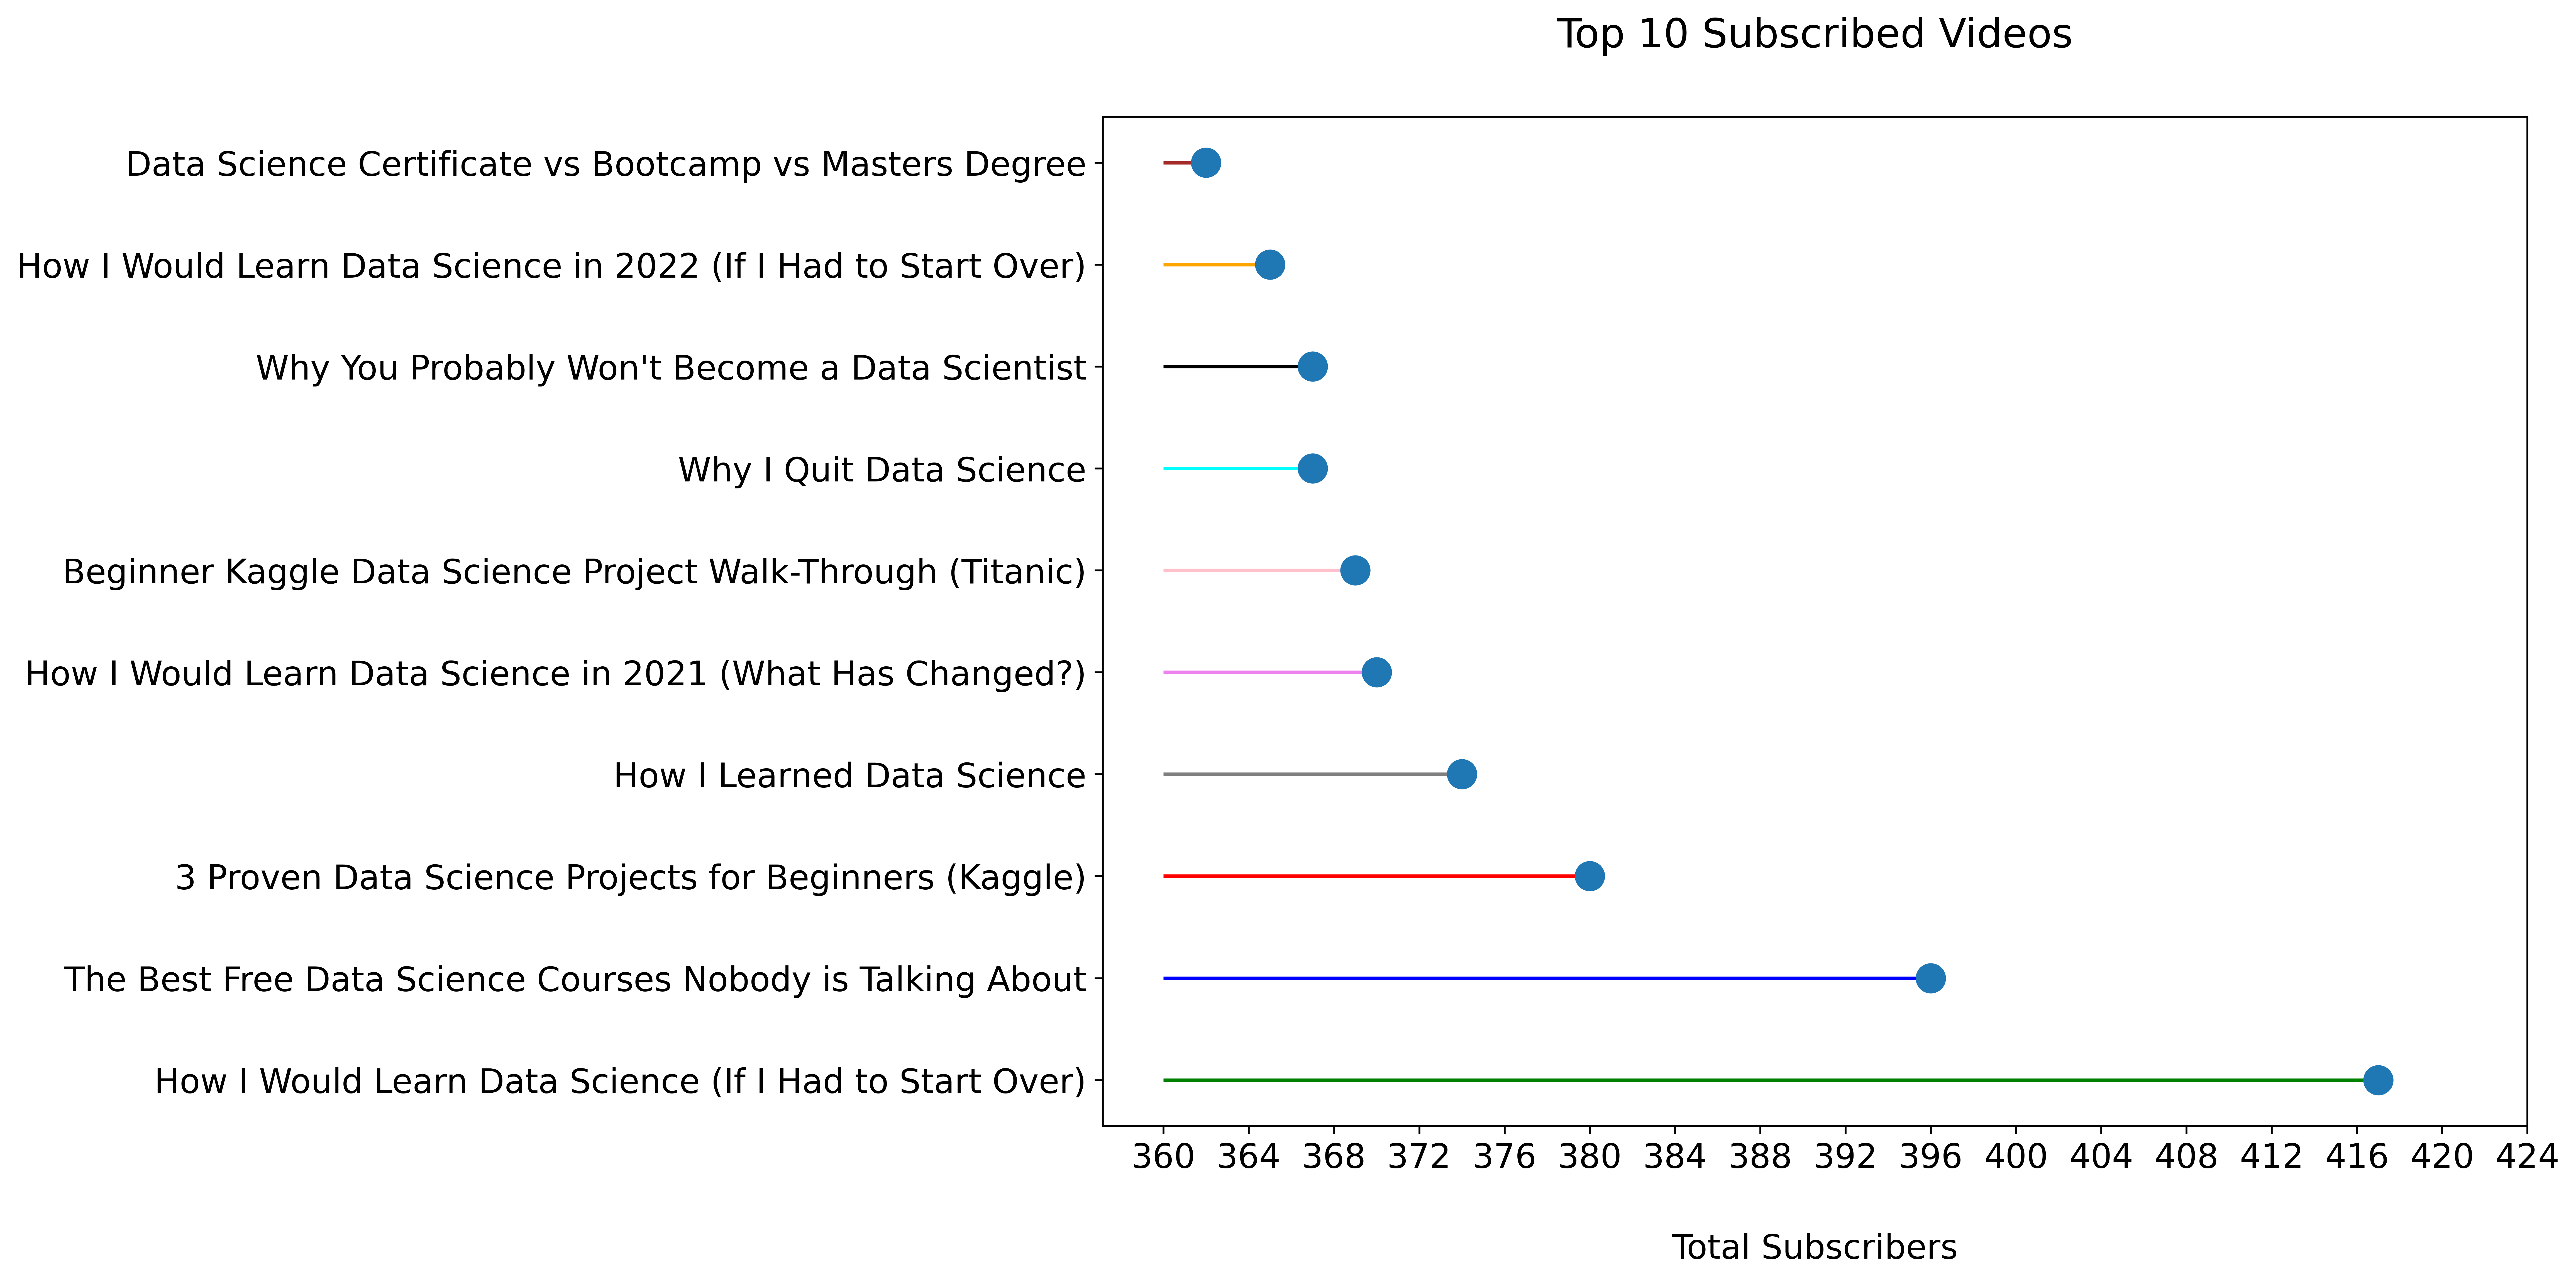

In [340]:
#Plot top 10 'video titles' with categorical y-axis 'total_subscriber' count using lolipop plot
plt.figure(figsize=(11,8), dpi=600)
colors = ['green', 'blue', 'red', 'grey', 'violet', 'pink', 'cyan', 'black', 'orange', 'brown']
plt.hlines(top10_country_subs1['video_title'], xmin=360, xmax=top10_country_subs1['total_subscribers'], colors=colors)
plt.plot(top10_country_subs1['total_subscribers'], top10_country_subs1['video_title'], 'o', markersize=12)
plt.xticks(range(360, 425, 4))
plt.xlabel('Total Subscribers', labelpad=25)
plt.title('Top 10 Subscribed Videos', pad=30)
plt.show()

In [341]:
print('which videos had more subscribers?')
print('A3: How I would Learn Data Science (If I had to Start Over) had the most subscribers')

which videos had more subscribers?
A3: How I would Learn Data Science (If I had to Start Over) had the most subscribers


In [342]:
#Answering Q4: What are the most common keywords used in video titles, we need to focus on 'video_title' column and extract frequent words

#Looking at 'video_title' column we see some stopwords in the titles, so let's remove them first.

#Import and initialize NLTK
import nltk.corpus
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kioshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [343]:
#Convert 'words' column into a list.
country_short_name['words'] = list(country_short_name.video_title)

In [344]:
#Remove stopwords from 'word' column
country_short_name['words'] = country_short_name['words'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Remove numbers from'words' column because we want focus on keywords only.
country_short_name['words'] = country_short_name['words'].str.replace('\d+', '', regex=True)

In [345]:
#Find frequency of words used in video_titles using 'words' column.

#Use 'value_count' with 'explode' for quickest way to get frequency of words in 'video_title'  column.
word_50 = country_short_name.words.str.split().explode().value_counts().rename_axis(
    'words').reset_index(name='frequency')
word_50

,words,frequency
0,Data,46376
1,Science,33705
2,-,14091
3,How,9663
4,Your,7576
...,...,...
697,Show,88
698,Support,77
699,Next,77
700,Thank,77


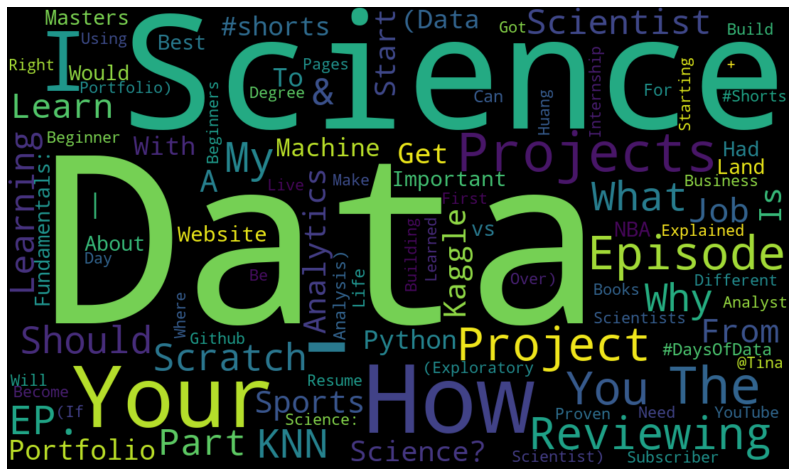

In [346]:
#Import word cloud
from wordcloud import WordCloud
from PIL import Image

#Convert word_50 to dictionary (dict)
wordcloud_words = dict(zip(word_50['words'].tolist(), word_50['frequency'].tolist()))

#Create WordCloud from word_50 dataframe.
wordcloud_img = WordCloud(width=1100, height=650, max_words=100).generate_from_frequencies(wordcloud_words)

#Plot WordCloud
plt.figure(figsize=(14,13))
plt.imshow(wordcloud_img, interpolation='bilinear')
plt.axis('off')
plt.show()

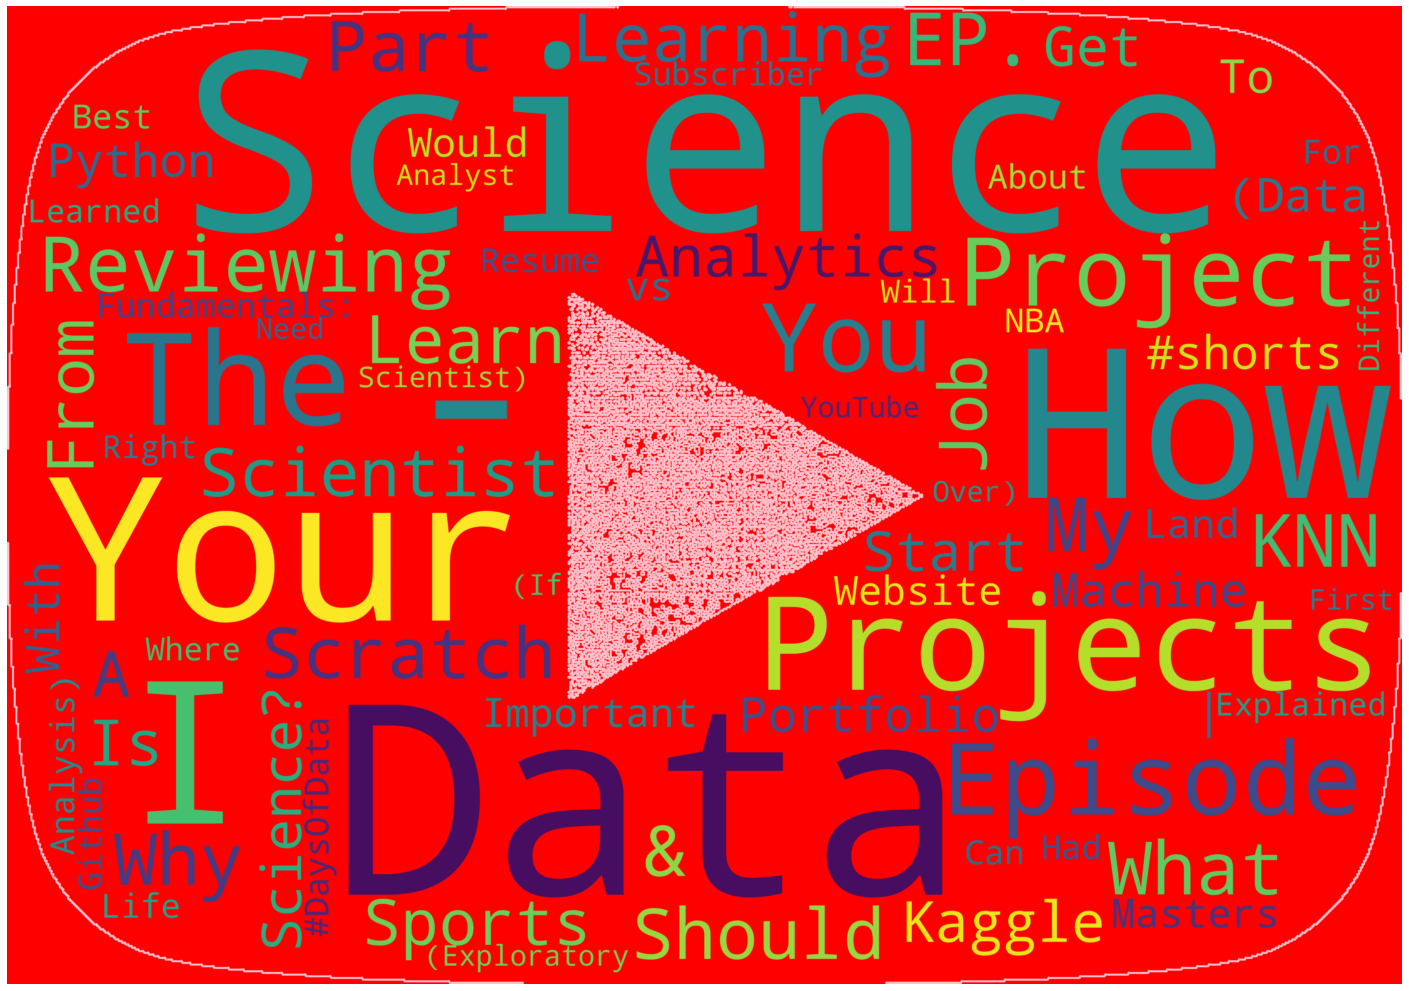

In [347]:
#Mask Youtube logo using Image library
yt_mask = np.array(Image.open('youtube1.png'))
yt_mask_wrap = WordCloud(scale=5, relative_scaling=0.2, max_words=75, background_color='red', 
                         mask=yt_mask, collocations=True, contour_width=8, 
                         contour_color='pink').generate_from_frequencies(wordcloud_words)

#Plot WordCloud with mask
plt.figure(figsize=(25,23))
plt.imshow(yt_mask_wrap, interpolation='bilinear')
plt.axis('off')
plt.show()

In [348]:
print('Q4: What are the most common keywords used in video titles?') 
print('We can see from the Wordcloud that *Data*, *Science*, *How*, *Your*, *The*, *Projects* stand out immediately as common words used')

Q4: What are the most common keywords used in video titles?
We can see from the Wordcloud that *Data*, *Science*, *How*, *Your*, *The*, *Projects* stand out immediately as common words used


In [349]:
#Export cleaned dataframe - 'country_short_name'to create interactive dashboard
country_short_name.to_csv('clean_country_subs')